# PyTorch Tutorial, Torchvision Transforms:
#### Torchvision transforms are mostly image transformations 
- Download an RGB image and save it locally
- Apply FiveCrop and CenterCrop to the given image
- Use random transforms such as ColorJitter and RandomRotation
- Define callable class to use Funcional transforms such as rotate and adjust_saturation 

https://github.com/ostad-ai/PyTorch-Tutorial

In [1]:
# importing the necessary modules
import torch
import torchvision.transforms as T
from matplotlib import pyplot as plt
from PIL import Image
import requests

We first download an RBG image from the specified address and save it locally, as shown below:

In [2]:
image_local_path="C:/tmp/coffee.jpg"
image_internet_path="https://raw.githubusercontent.com/ostad-ai/Generative-Art/"+\
                    "f7414a9b402a7577b1f2c19fb45135be0eed4cec/coffee.jpg"
with open(image_local_path,'wb') as file:    
    file.write(requests.get(image_internet_path).content)

**FiveCrop**, creates five crops of the original image, from four corners of the image plus the center one.
<br> The size in the argument of FiveCrop is often in format (H,W), where H is the height and W is the width.

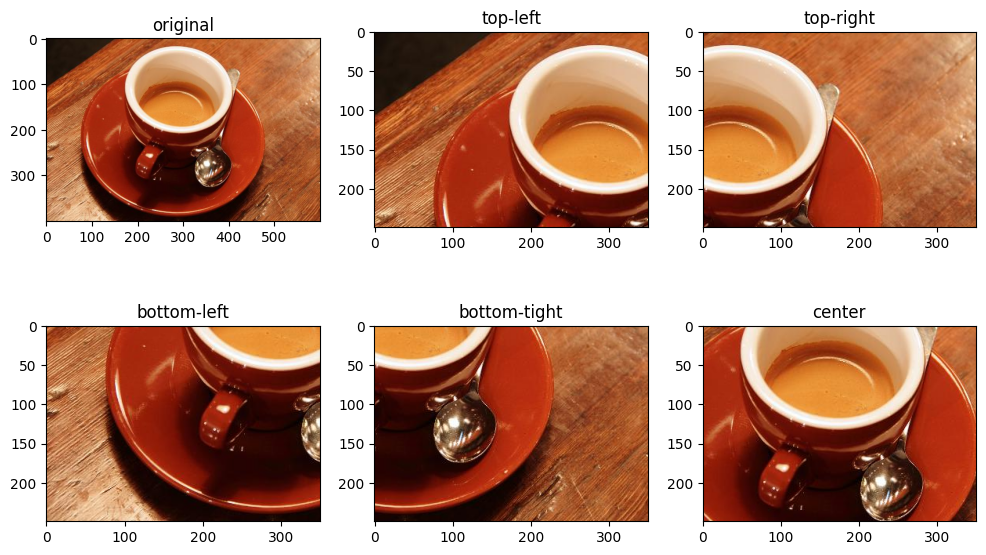

In [3]:
image=Image.open(image_local_path)
images=T.FiveCrop(size=(250,350))(image)
labels=['top-left','top-right','bottom-left','bottom-tight','center']
plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
plt.imshow(image); plt.title('original')
for i,img in enumerate(images):
    plt.subplot(2,3,i+2)
    plt.title(labels[i])
    plt.imshow(img)
plt.show()

**CenterCrop:** Moreover, we can crop the image only from its center with *CenterCrop()*.

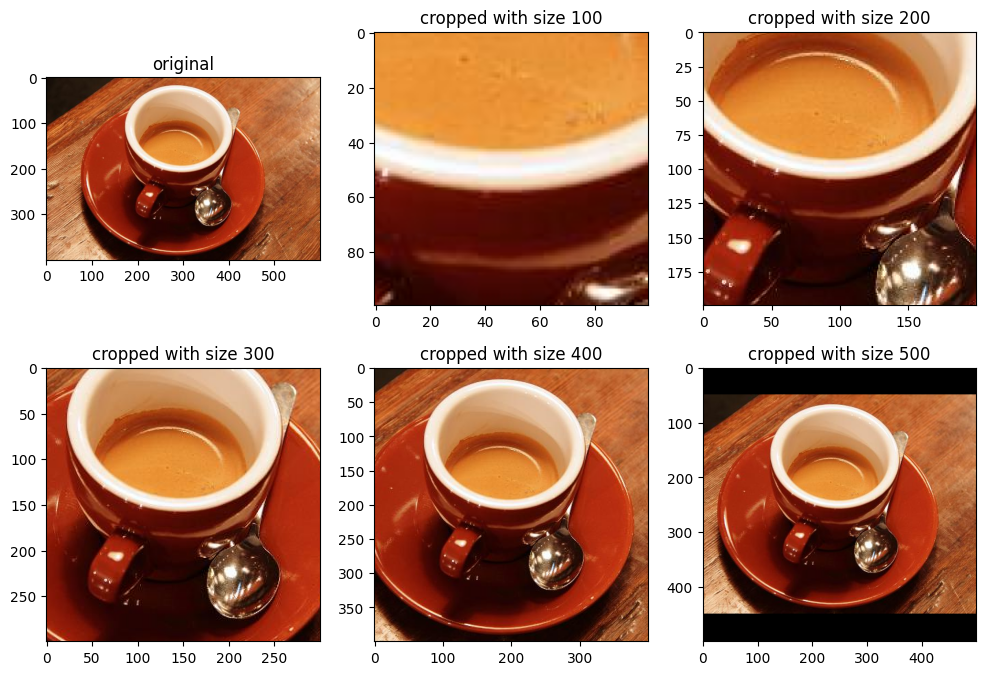

In [6]:
image=Image.open(image_local_path)
sizes=[100,200,300,400,500]
images=[T.CenterCrop(size=s)(image) for s in sizes]
labels=['top-left','top-right','bottom-left','bottom-tight','center']
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(image); plt.title('original')
for i,img in enumerate(images):
    plt.subplot(2,3,i+2)
    plt.title(f'cropped with size {sizes[i]}')
    plt.imshow(img)
plt.show()

**Random transforms:** With theses kinds of tranforms, everytime we run the transform, it produces different result.
<br>**ColorJitter:** It randomly changes the brightness, contrast, hue, and saturation of the given image. Hue must be between zero and 0.5.

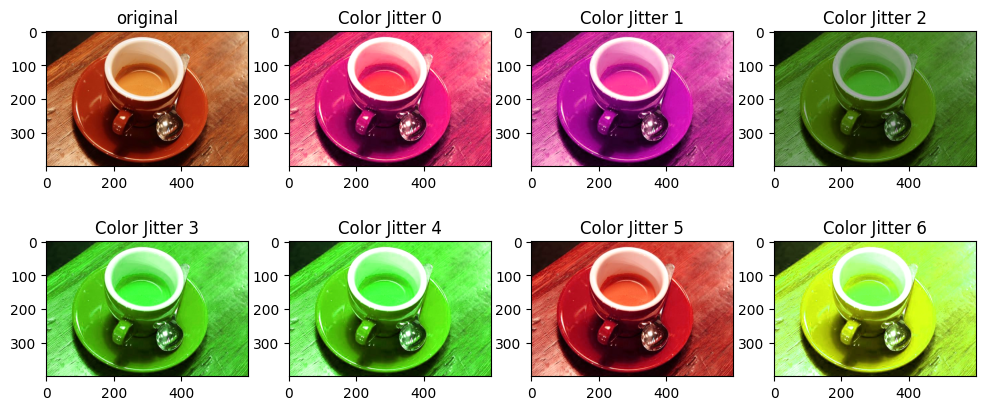

In [7]:
image=Image.open(image_local_path)
images=[T.ColorJitter(brightness=.5,hue=.25)(image) for _ in range(7)]
plt.figure(figsize=(12,5))
plt.subplot(2,4,1)
plt.imshow(image); plt.title('original')
for i,img in enumerate(images):
    plt.subplot(2,4,i+2)
    plt.title(f'Color Jitter {i}')
    plt.imshow(img)
plt.show()

**RandomRotation:** It rotates the given image by a random angle. The angle is given as a tuple which limits the minimum or maximum value of rotation. If a *number* is given, the range of angles will be [-*number*, *number*]
<br>Reminder: We can rotate an image by a fixed angle using Rotate function. 

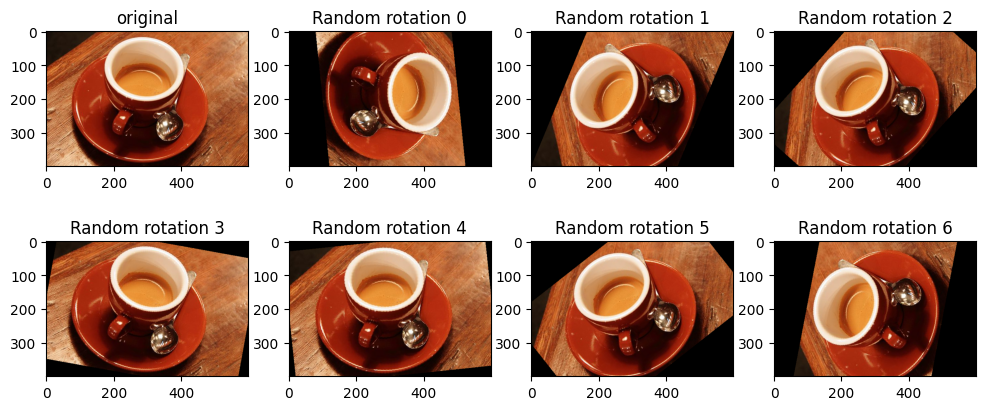

In [8]:
image=Image.open(image_local_path)
images=[T.RandomRotation(degrees=90)(image) for _ in range(7)]
labels=['top-left','top-right','bottom-left','bottom-tight','center']
plt.figure(figsize=(12,5))
plt.subplot(2,4,1)
plt.imshow(image); plt.title('original')
for i,img in enumerate(images):
    plt.subplot(2,4,i+2)
    plt.title(f'Random rotation {i}')
    plt.imshow(img)
plt.show()

**Functional Transforms:** With functional transforms, we have better control over the transformations in comparision to those of random transforms. Therefore, it does not show random behavior.
<br> We can however define a custom transform, which must be **callable** class.
<br>For introduction of **callable classes**, you may see:
<br>https://raw.githubusercontent.com/ostad-ai/Python-Everything/main/P-E-callable%20instances%20with%20__call__%20method.ipynb

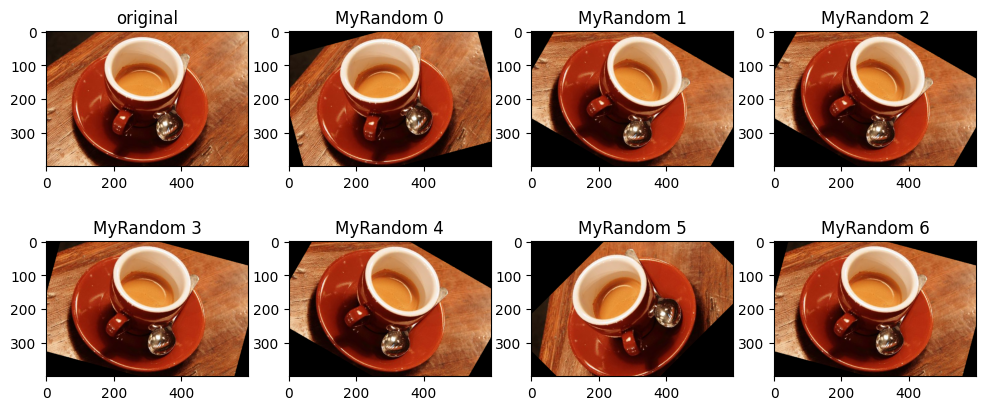

In [9]:
# defining a callable class for rotation with specified angles
class MyRotation:
    def __init__(self,angles):
        self.angles=angles
    def __call__(self,img):
        angle=self.angles[torch.randint(len(self.angles),(1,))[0].item()]
        return T.functional.rotate(img,angle)
    
rot=MyRotation([-45,-30,-15,0,15,30,45])
image=Image.open(image_local_path)
images=[rot(image) for _ in range(7)]
plt.figure(figsize=(12,5))
plt.subplot(2,4,1)
plt.imshow(image); plt.title('original')
for i,img in enumerate(images):
    plt.subplot(2,4,i+2)
    plt.title(f'MyRandom {i}')
    plt.imshow(img)
plt.show()

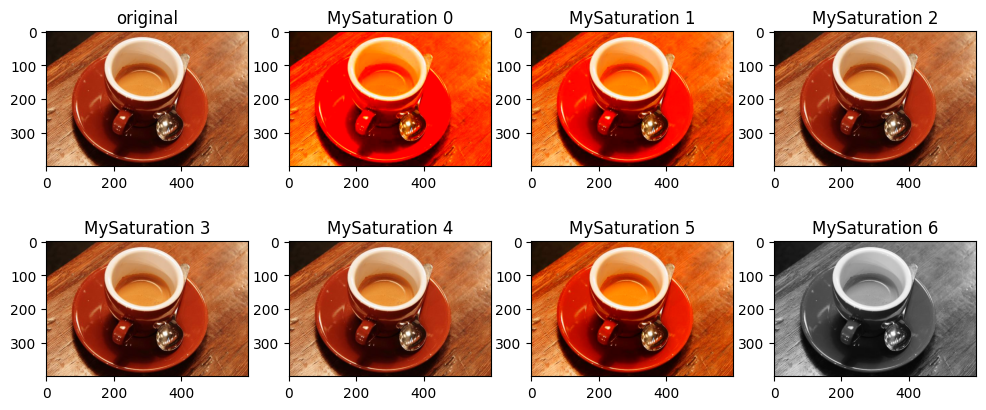

In [8]:
# defining a callable class for saturation with specified factors
class MySaturation:
    def __init__(self,factors):
        self.factors=factors
    def __call__(self,img):
        factor=self.factors[torch.randint(len(self.factors),(1,))[0].item()]
        return T.functional.adjust_saturation(img,factor)
    
satu=MySaturation([0,.5,1,1.5,2,2.5,3])
image=Image.open(image_local_path)
images=[satu(image) for _ in range(7)]
plt.figure(figsize=(12,5))
plt.subplot(2,4,1)
plt.imshow(image); plt.title('original')
for i,img in enumerate(images):
    plt.subplot(2,4,i+2)
    plt.title(f'MySaturation {i}')
    plt.imshow(img)
plt.show()